In [1]:
import pyabc
import os
import matplotlib.pyplot as plt
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars

3 31996 12668 13848.361707244112 -6.577012272275681 -6.487924463600962 1.0931766425042715
5 53759 24766 19213.80314934419 -12.939846167469454 -13.193688977495185 0.775813742604546
10 268489 172579 509123.4919425479 -29.525847858927534 -28.44401235766989 2.950089477529409
15 2647412 2181014 19158218.097319208 -46.37630275640552 -44.20336089564415 8.784087629570102


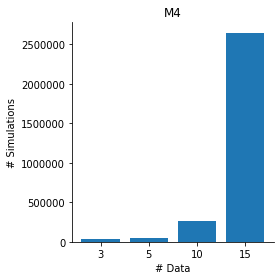

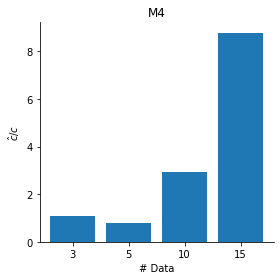

In [2]:
import pickle
import numpy as np

factors = []
arr_n_t = [3,5,10,15]
n_d = len(arr_n_t)
arr_total_samples_assa = []

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, noise_model='poisson')
    kernel = mv.get_kernel()
    data = pickle.load(open(f"data/data_{n_t}_poisson.p", 'rb'))[1]
    kernel.initialize(0, None, data)
    # the (too high) maximum density
    c_hat = kernel.pdf_max
    
    log_file = f"log/log_acceptor_mrna_{n_t}_poisson_stochacc.json"
    df = pyabc.storage.load_dict_from_json(log_file)
    # the last (highest) used adaptive c (could be computed by optimization)
    c = df[max(df.keys())]
    
    h = pyabc.History(f"sqlite:///mrna_{n_t}_poisson_stochacc.db", create=False)
    # number of samples in the last iteration
    samples = np.array(h.get_all_populations()['samples'])[-1]

    total_samples = sum(h.get_all_populations()['samples'])
    arr_total_samples_assa.append(total_samples)

    factor = np.exp(c_hat - c)
    factors.append(factor)
    
    samples_prediction = np.exp(c_hat - c) * samples
    print(n_t, total_samples, samples, samples_prediction, c, c_hat, samples_prediction / samples)
    
fig, ax = plt.subplots()
ax.bar(np.arange(n_d), arr_total_samples_assa)
ax.set_xticks(np.arange(n_d))
ax.set_xticklabels(arr_n_t)
ax.set_xlabel("# Data")
ax.set_ylabel("# Simulations")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("M4")
fig.set_size_inches((4,4))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f"mrna_poisson_datapoint_scaling_samples.{fmt}", format=fmt)
    
fig, ax = plt.subplots()
ax.bar(np.arange(n_d), factors)
ax.set_xticks(np.arange(n_d))
ax.set_xticklabels(arr_n_t)
ax.set_xlabel("# Data")
ax.set_ylabel("$\hat c / c$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("M4")
fig.set_size_inches((4,4))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f"mrna_poisson_datapoint_scaling.{fmt}", format=fmt)